In [24]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from utils.preprocessing import log_transform
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.optimize as opt
import warnings

warnings.filterwarnings("ignore")

In [25]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

analyte1 = pd.read_csv('data/Exponential_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte2 = pd.read_csv('data/Exponential_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte3 = pd.read_csv('data/Exponential_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

# analyte1 = pd.read_csv('data/Sampled_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
# analyte2 = pd.read_csv('data/Sampled_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
# analyte3 = pd.read_csv('data/Sampled_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

[analyte1, analyte2, analyte3]  = log_transform([analyte1, analyte2, analyte3])
analyte1['Label'] = 1
analyte2['Label'] = 2
analyte3['Label'] = 3

combined_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

data = combined_data[['Sensor1','Sensor2','Sensor3','Label']]
data.head(3)

,Sensor1,Sensor2,Sensor3,Label
0,-97.307860,28.062607,16.385331,1
1,-92.303080,98.933548,61.332904,2
2,-285.739766,70.267276,41.123502,2


In [26]:
features = data[['Sensor1', 'Sensor2', 'Sensor3']]
labels = data['Label']

kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(features)
data['Cluster_Original'] = kmeans_original.labels_

In [27]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_features)
data['Cluster_PCA'] = kmeans_pca.labels_

In [28]:
comparison_original = pd.crosstab(data['Label'], data['Cluster_Original'], rownames=['Actual'], colnames=['Cluster'])
print("Comparison for Original Data:")
print(comparison_original)

comparison_pca = pd.crosstab(data['Label'], data['Cluster_PCA'], rownames=['Actual'], colnames=['Cluster'])
print("Comparison for PCA-Transformed Data:")
print(comparison_pca)

Comparison for Original Data:
Cluster     0    1     2
Actual                  
1           0    0  1022
2           0  752   270
3        1022    0     0
Comparison for PCA-Transformed Data:
Cluster     0     1    2
Actual                  
1           0  1022    0
2           0   262  760
3        1022     0    0


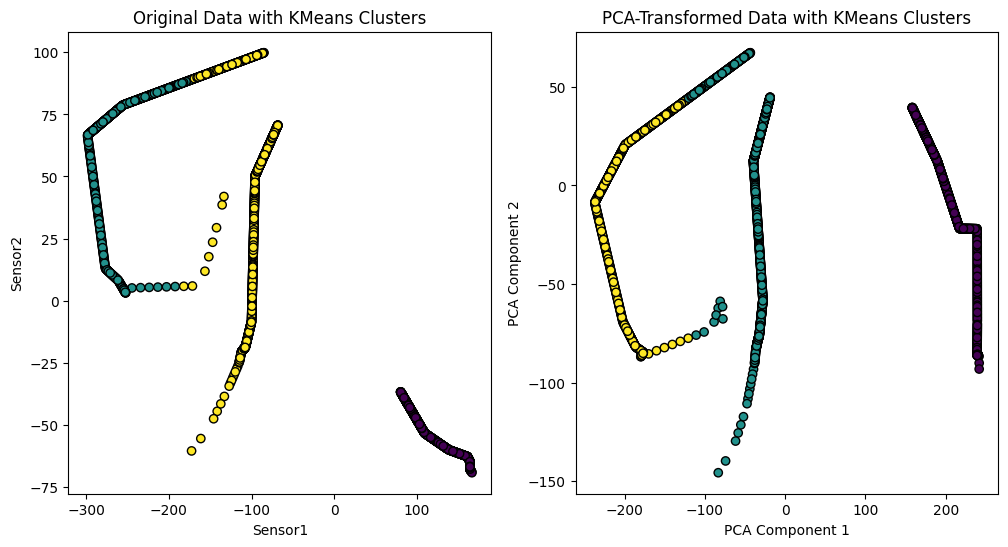

In [29]:

# Optionally, visualize the PCA-transformed data and clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot original data clusters
plt.subplot(1, 2, 1)
plt.scatter(features['Sensor1'], features['Sensor2'], c=data['Cluster_Original'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Original Data with KMeans Clusters')
plt.xlabel('Sensor1')
plt.ylabel('Sensor2')

# Plot PCA-transformed data clusters
plt.subplot(1, 2, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['Cluster_PCA'], cmap='viridis', marker='o', edgecolor='k')
plt.title('PCA-Transformed Data with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

In [30]:
print("Accuracy for Original Data: ", accuracy_score(data['Label'], data['Cluster_Original']))

Accuracy for Original Data:  0.08806262230919765
